K Nearest Neighbor

In [44]:
import pandas as pd
import numpy as np

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
#import pandas as pd

#read_file = pd.read_csv (r'\KNN_Project_Data.txt')
#read_file.to_csv (r'Path where the CSV will be saved\File name.csv', index=None)

In [47]:
df = pd.read_csv('KNN_Project_Data',index_col = 0)
df.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
XVPM,,,,,,,,,,
1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


Standardizing the variables

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scale = StandardScaler()

In [50]:
scale.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scaled_feature = scale.transform(df.drop('TARGET CLASS',axis=1))

In [52]:
scaled_feature

array([[-0.44343461,  1.61980773, -0.9582548 , ..., -0.93279392,
         1.00831307, -1.06962723],
       [-1.05657361,  1.7419175 , -1.50422015, ..., -0.46186435,
         0.25832069, -1.04154625],
       [-0.43698145,  0.77579285,  0.21339413, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.97901454,  0.83771499,  0.01401811, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [-0.99239881,  0.0303711 ,  1.06295359, ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.79510909,  1.12180047,  1.18594424, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [53]:
featured = pd.DataFrame(scaled_feature,columns=df.columns[:-1])
featured.head()

,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


Training the Data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('TARGET CLASS',axis=1), df['TARGET CLASS'], test_size=0.30)

Using KNN, and starting with K=1

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)

In [58]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [59]:
predict = knn.predict(X_test)

In [60]:
predict

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0])

Evaluation

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
print(confusion_matrix(y_test,predict))

[[114  47]
 [ 38 101]]


In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.75      0.71      0.73       161
          1       0.68      0.73      0.70       139

avg / total       0.72      0.72      0.72       300



Changing K Values to fit in more data

In [79]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

Plotting the k_values

Text(0.5,1,'Error_rate vs K value')

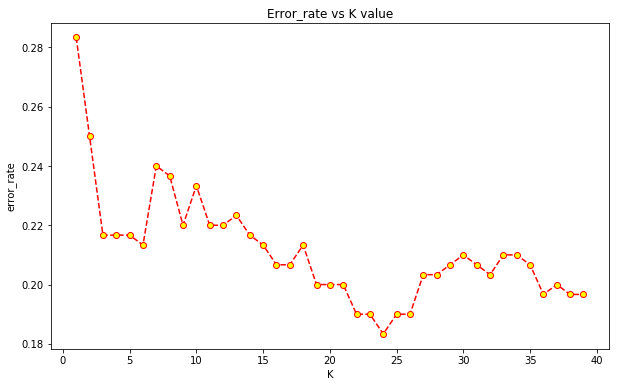

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color = 'red',linestyle = 'dashed', marker = 'o', markerfacecolor = 'yellow')
plt.xlabel('K')
plt.ylabel('error_rate')
plt.title('Error_rate vs K value')

Retraining the Model with a New K Value

In [82]:
#K = 24
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)

In [84]:
print(confusion_matrix(y_test,predict))
print('\n')
print(classification_report(y_test,predict))

[[137  24]
 [ 31 108]]


             precision    recall  f1-score   support

          0       0.82      0.85      0.83       161
          1       0.82      0.78      0.80       139

avg / total       0.82      0.82      0.82       300

